In [1]:
import pandas as pd
import numpy as np
import json
from sklearn import datasets
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import mutual_info_classif

In [2]:
train_x_src_path = '../Dataset/assignment2New.json'
train_y_src_path = '../DataBook/Assignment2_Data_Analyst.xlsx'

test_x_src_path = '../Dataset/assignment1New.json'
test_y_src_path = '../DataBook/Assignment1_Data_Analyst.xlsx'

In [3]:
train_data = pd.read_json(train_x_src_path)
test_data = pd.read_json(test_x_src_path)

In [4]:
train_df_supervision = pd.read_excel(train_y_src_path)
train_plagiarised_array = train_df_supervision['Plagiarised'].astype(int).values

test_df_supervision = pd.read_excel(test_y_src_path)
test_plagiarised_array = test_df_supervision['Plagiarised'].astype(int).values

In [5]:
X_train = np.nan_to_num(train_data.values, nan=0, copy=True).astype(int)
y_train = train_plagiarised_array

X_test = np.nan_to_num(test_data.values, nan=0, copy=True).astype(int)
y_test = test_plagiarised_array

In [6]:
difference_in_columns = X_test.shape[1] - X_train.shape[1]

# if difference_in_columns > 0:
#     last_values = X_train[:, -1]
#     new_columns = np.tile(last_values, (difference_in_columns, 1)).T
#     X_train_extended = np.hstack((X_train, new_columns))
#     X_test_extended = X_test
# elif difference_in_columns < 0:
#     last_values = X_test[:, -1]
#     new_columns = np.tile(last_values, (-difference_in_columns, 1)).T
#     X_test_extended = np.hstack((X_test, new_columns))
#     X_train_extended = X_train
# else:
#     X_train_extended = X_train
#     X_test_extended = X_test

if difference_in_columns > 0:
    new_columns = np.zeros((X_train.shape[0], difference_in_columns))
    X_train_extended = np.hstack((X_train, new_columns))
    X_test_extended = X_test

elif difference_in_columns < 0:
    new_columns = np.zeros((X_test.shape[0], -difference_in_columns))
    X_test_extended = np.hstack((X_test, new_columns))
    X_train_extended = X_train

else:
    X_train_extended = X_train
    X_test_extended = X_test

In [7]:
imputer = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)
X_train_imputed = imputer.fit_transform(X_train_extended)
X_test_imputed = imputer.fit_transform(X_test_extended)

In [8]:
p = Perceptron()
p.fit(X_train_imputed,y_train)

print(f"Training data score: {p.score(X_train_imputed, y_train)}")
print(f"Test data score: {p.score(X_test_imputed, y_test)}")

Training data score: 1.0
Test data score: 0.8888888888888888


In [9]:
predictions = p.predict(X_test_imputed)
for i in range(len(X_test_imputed)):
    print("Predicted:", predictions[i], "Actual:", y_test[i])

Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 1 Actual: 1
Predicted: 1 Actual: 0
Predicted: 1 Actual: 1
Predicted: 1 Actual: 1
Predicted: 1 Actual: 1
Predicted: 0 Actual: 0
Predicted: 0 Actual: 1
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 1 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 1
Predicted: 0 Actual: 0
Predicted: 0 Actual: 1
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 1
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 0 Actual: 0
Predicted: 

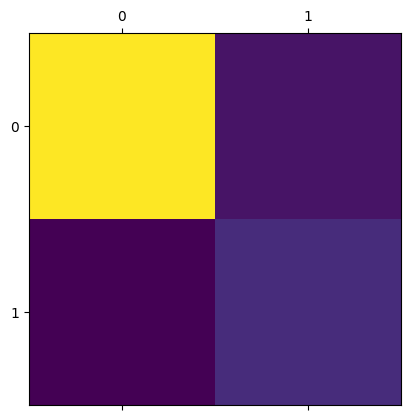

In [10]:
cm = confusion_matrix( p.predict(X_test_imputed), y_test)
# plt.set_cmap()
plt.matshow(cm)